Loading required package: Rcpp

Loading 'brms' package (version 2.15.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks rstan::extract()
✖ 

 Family: bernoulli 
  Links: mu = logit 
Formula: tested ~ age + treatment + age:treatment 
   Data: janssen_tb (Number of observations: 39321) 
Samples: 3 chains, each with iter = 12500; warmup = 500; thin = 1;
         total post-warmup samples = 36000

Population-Level Effects: 
                          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                    -3.88      0.06    -4.01    -3.76 1.00    29276
ageOlder                     -0.46      0.12    -0.71    -0.22 1.00    19745
treatmentVaccine             -1.02      0.12    -1.26    -0.79 1.00    19011
ageOlder:treatmentVaccine    -0.44      0.27    -0.99     0.08 1.00    16358
                          Tail_ESS
Intercept                    26115
ageOlder                     21887
treatmentVaccine             21152
ageOlder:treatmentVaccine    19818

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduc

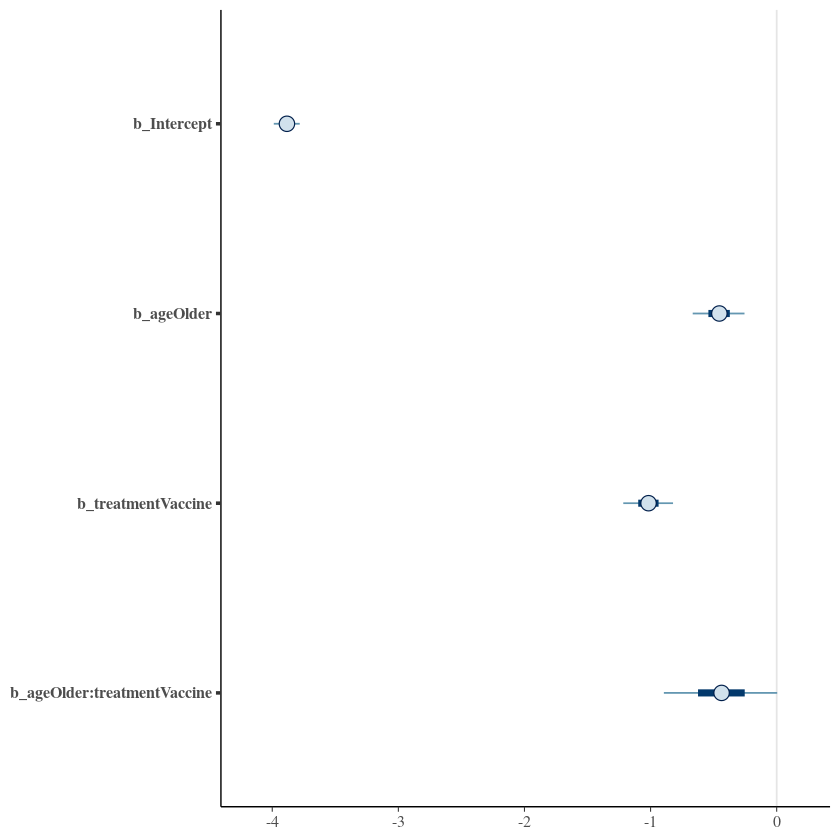

,Parameter,MAP,CI,CI_low,CI_high,pd,Rhat,ESS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,b_Intercept,-3.8840058,0.95,-4.0065023,-3.76348989,1.0000000,1.0000130,29277.00
1,b_ageOlder,-0.4451283,0.95,-0.7066104,-0.21693713,0.9998611,1.0000541,19716.05
4,b_treatmentVaccine,-1.0131771,0.95,-1.2562806,-0.78869173,1.0000000,0.9999749,18955.04
2,b_ageOlder.treatmentVaccine,-0.4446530,0.95,-0.9742431,0.09232553,0.9480278,1.0000398,16331.32


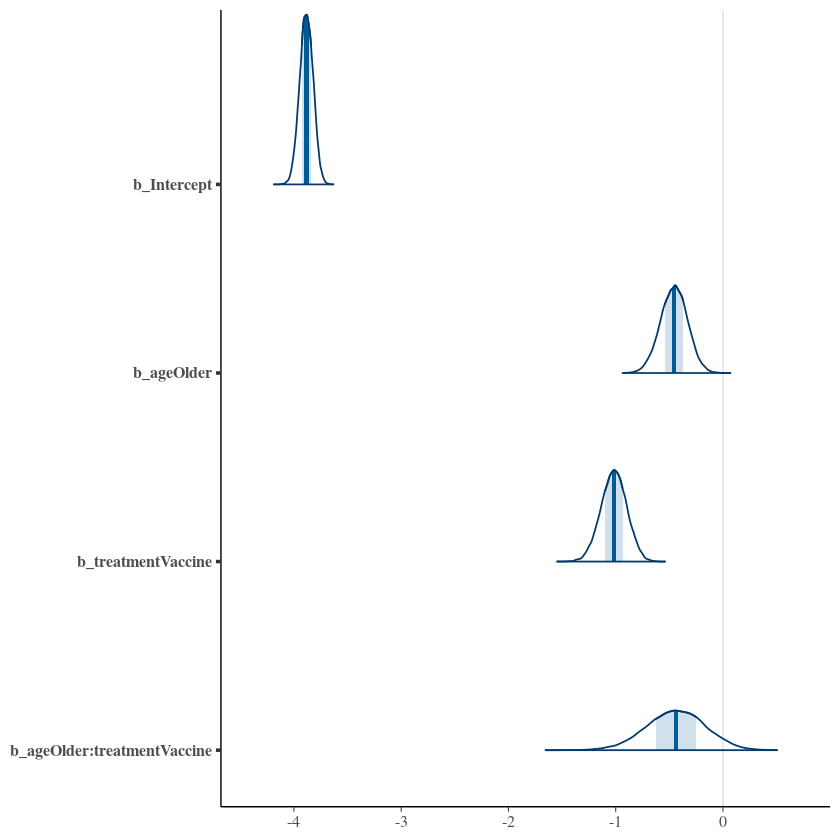

In [1]:
library(brms)
library(rstan)
library(tidyverse)

age <- c(rep("lt60", 12881), rep("Older", 19691-12881),
         rep("lt60", 12830), rep("Older", 19630-12830))
treatment <- c(rep("Placebo", 12881), rep("Placebo", 19691-12881),
               rep("Vaccine", 12830), rep("Vaccine", 19630-12830))
tested <- c(rep("Pos", 260), rep("Neg", 12881-260),
            rep("Pos", 88), rep("Neg", (19691-12881)-88),
            rep("Pos", 95),  rep("Neg", 12830-95),
            rep("Pos", 21),  rep("Neg", (19630-12830)-21))
janssen_tb <- tibble(age = age, tested = tested,treatment = treatment)

janssen_bf <- brm(data = janssen_tb,
                   family = bernoulli(link = logit),
                   tested ~ age + treatment + age:treatment ,
                   iter = 12500, warmup = 500, chains = 3, cores = 3,
                   control = list(adapt_delta = .99, max_treedepth = 12),
                   seed = 9,file = "janssen_age1")

summary(janssen_bf)

mcmc_plot(janssen_bf)
mcmc_plot(janssen_bf, type='areas')

bayestestR::describe_posterior(janssen_bf,
                               ci=0.95,
                               test=c("p_direction"),
                               centrality="MAP")